In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd())) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime, timedelta

from src.constants import HEADERS
from src.steps.ingest.process_data import ProcessData
from src.steps.transform.transform import TransformData

pd.set_option('display.max_columns', None)

In [2]:
DATA_DIR = '../data/'
lgl_path = os.path.join(DATA_DIR, 'df_logs.csv')
hustle_files = [f for f in os.listdir('../data') if f.startswith('df_hustle')]
hustle_paths = [os.path.join(DATA_DIR, f) for f in hustle_files]

# Read in Data
df_logs = pd.read_csv(lgl_path)
df_hustle_list = [pd.read_csv(f) for f in hustle_paths]
df_hustle = pd.concat(df_hustle_list)

In [3]:
neutral_game_ids = [22400147, 22401230, 22401229, 22400621, 22400633]
neutral_home_teams = ['WAS','OKC','ATL','IND','SAS']
neutral_dict = dict(zip(neutral_game_ids,neutral_home_teams))
    
proc_data = ProcessData(df_logs = df_logs, df_hustle=df_hustle, neutral_dict=neutral_dict)
df_proc = proc_data.process_data()

Index(['GAME_ID', 'TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'MINUTES', 'PTS', 'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT',
       'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS',
       'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED',
       'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS',
       'DEF_BOXOUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'BOX_OUTS', 'HOME_TEAM_ID', 'HOME_IND'],
      dtype='object')
Index(['GAME_ID', 'TEAM_ID', 'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT',
       'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS',
       'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED',
       'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS',
       'DEF_BOXOUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'BOX_OUTS', 'HOME_IND'],
      dtype='object')


In [4]:
transform_data = TransformData(df_proc=df_proc)
df_trans = transform_data.engineered_features()

In [5]:
df_proc.head(2)

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,16,16,27,34,6,2,1,4,0,0,1,2,9,10,4,0,6,2,15,19,0,2,6,2,12,15,0,2,19,22,99.32,102.32,126.862666,114.347146,12.515520,-12.515520
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,18,22,71,63,13,12,7,3,2,3,2,2,3,18,7,6,11,11,35,30,1,1,13,14,36,33,5,1,8,43,116.12,118.00,105.924905,92.372881,13.552024,-13.552024


In [6]:
df_trans.head(2)

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,16,16,27,34,6,2,1,4,0,0,1,2,9,10,4,0,6,2,15,19,0,2,6,2,12,15,0,2,19,22,99.32,102.32,126.862666,114.347146,12.515520,-12.515520
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,18,22,71,63,13,12,7,3,2,3,2,2,3,18,7,6,11,11,35,30,1,1,13,14,36,33,5,1,8,43,116.12,118.00,105.924905,92.372881,13.552024,-13.552024


In [10]:
df_trans.shape

(575, 74)

In [19]:
hustle_stats = list(df_trans.columns[-36:-6])
hustle_stats

['AWAY_DEFLECTIONS',
 'HOME_DEFLECTIONS',
 'AWAY_CONTESTED_SHOTS',
 'HOME_CONTESTED_SHOTS',
 'AWAY_BOX_OUT_PLAYER_TEAM_REBS',
 'HOME_BOX_OUT_PLAYER_TEAM_REBS',
 'AWAY_LOOSE_BALLS_RECOVERED',
 'HOME_LOOSE_BALLS_RECOVERED',
 'AWAY_OFF_BOXOUTS',
 'HOME_OFF_BOXOUTS',
 'AWAY_DEF_LOOSE_BALLS_RECOVERED',
 'HOME_DEF_LOOSE_BALLS_RECOVERED',
 'AWAY_SCREEN_ASSISTS',
 'HOME_SCREEN_ASSISTS',
 'AWAY_BOX_OUT_PLAYER_REBS',
 'HOME_BOX_OUT_PLAYER_REBS',
 'AWAY_DEF_BOXOUTS',
 'HOME_DEF_BOXOUTS',
 'AWAY_CONTESTED_SHOTS_2PT',
 'HOME_CONTESTED_SHOTS_2PT',
 'AWAY_CHARGES_DRAWN',
 'HOME_CHARGES_DRAWN',
 'AWAY_BOX_OUTS',
 'HOME_BOX_OUTS',
 'AWAY_CONTESTED_SHOTS_3PT',
 'HOME_CONTESTED_SHOTS_3PT',
 'AWAY_OFF_LOOSE_BALLS_RECOVERED',
 'HOME_OFF_LOOSE_BALLS_RECOVERED',
 'AWAY_SCREEN_AST_PTS',
 'HOME_SCREEN_AST_PTS']

In [24]:
hs = list(set([stat.replace("HOME_","").replace("AWAY_","") for stat in hustle_stats]))

In [25]:
hs

['SCREEN_AST_PTS',
 'DEFLECTIONS',
 'CONTESTED_SHOTS',
 'DEF_BOXOUTS',
 'CONTESTED_SHOTS_2PT',
 'BOX_OUT_PLAYER_TEAM_REBS',
 'CHARGES_DRAWN',
 'LOOSE_BALLS_RECOVERED',
 'OFF_BOXOUTS',
 'BOX_OUTS',
 'DEF_LOOSE_BALLS_RECOVERED',
 'SCREEN_ASSISTS',
 'BOX_OUT_PLAYER_REBS',
 'OFF_LOOSE_BALLS_RECOVERED',
 'CONTESTED_SHOTS_3PT']

In [28]:
others = ['DEFLECTIONS', 'CHARGES_DRAWN']
contested_shots = ['CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT']
screen_ast = ['SCREEN_ASSISTS']
loose_balls = ['OFF_LOOSE_BALLS_RECOVERED','DEF_LOOSE_BALLS_RECOVERED']
boxouts = ['OFF_BOXOUTS','DEF_BOXOUTS']

hustle_features = contested_shots + screen_ast + loose_balls + boxouts + others
home_hustle_feat = [f"HOME_{feat}" for feat in hustle_features]
away_hustle_feat = [f"AWAY_{feat}" for feat in hustle_features]

In [27]:
def rmse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)**.5

In [30]:
X = df_trans[home_hustle_feat + away_hustle_feat]
X1 = sm.add_constant(X)
y = df_trans['HOME_NRtg']

reg_net1 = sm.OLS(endog=y, exog=X1).fit()
print(reg_net1.summary())

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.980
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.42e-13
Time:                        22:51:43   Log-Likelihood:                -2251.9
No. Observations:                 575   AIC:                             4542.
Df Residuals:                     556   BIC:                             4624.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [31]:
yhat_net1 = reg_net1.predict(X1)
print(f"RMSE: {rmse(y,yhat_net1): .3f}")

RMSE:  12.150


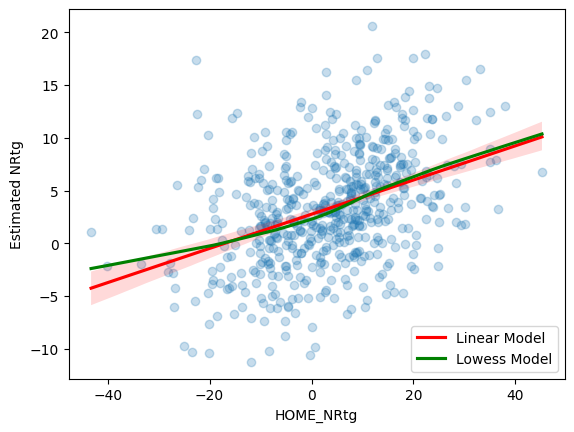

In [33]:
sns.regplot(x=y, y=yhat_net1, line_kws={'color': 'red', 'label':'Linear Model'}, scatter_kws={'color': 'tab:blue','alpha':.25})
sns.regplot(x=y, y=yhat_net1, lowess=True, line_kws={'color': 'green', 'label':'Lowess Model'}, scatter_kws={'color':'blue', 'alpha':0})

plt.ylabel('Estimated NRtg')
plt.legend(loc='best')

Text(0.5, 0, 'Predicted NRtg')

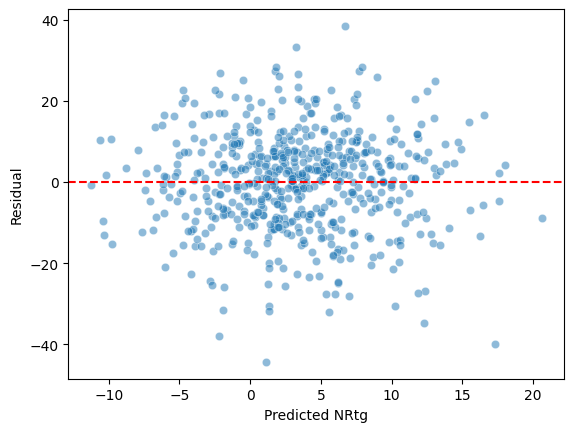

In [34]:
sns.scatterplot(x=yhat_net1, y=reg_net1.resid, alpha=.5)
plt.axhline(y=0, color='red',linestyle='dashed')
plt.ylabel('Residual')
plt.xlabel('Predicted NRtg')

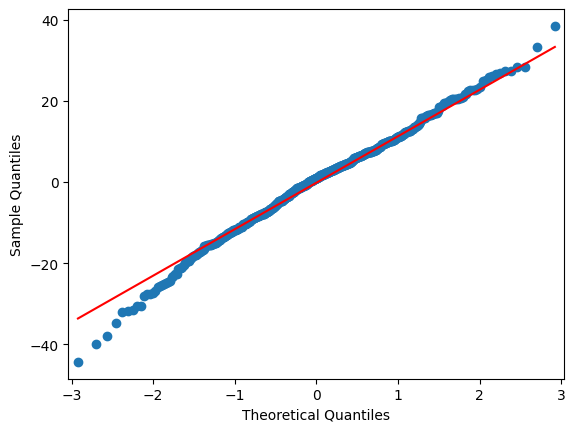

In [35]:
sm.qqplot(reg_net1.resid, line='q')
plt.show()

In [36]:
effort_net1_vec = np.array(reg_net1.params[1:]).reshape((-1,1))
effort_net1_mat = np.array(df_trans[home_hustle_feat + away_hustle_feat])
effort_net1_mat.shape, effort_net1_vec.shape

((575, 18), (18, 1))

In [37]:
df_trans['COMPOSITE_EFFORT_net1'] = effort_net1_mat @ effort_net1_vec

<Axes: xlabel='COMPOSITE_EFFORT_net1', ylabel='Count'>

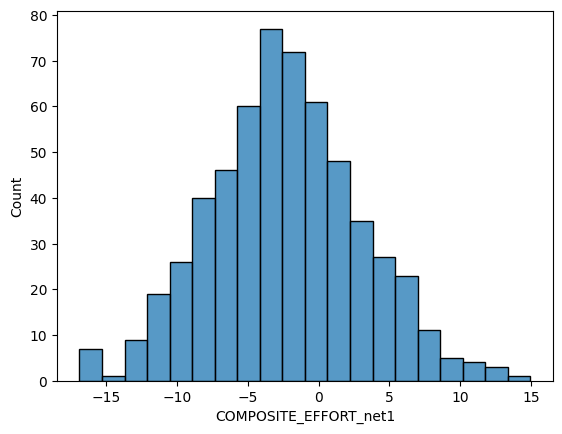

In [38]:
sns.histplot(df_trans['COMPOSITE_EFFORT_net1'])

In [40]:
df_trans['COMPOSITE_EFFORT_net1'].describe(percentiles=[.001,.01,.05,.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95,.99,.999])

count    575.000000
mean      -2.359284
std        5.350828
min      -16.900085
0.1%     -16.548443
1%       -15.454237
5%       -10.970915
10%       -9.293633
20%       -6.774476
25%       -5.788882
30%       -5.056424
40%       -3.718243
50%       -2.535766
60%       -1.323113
70%        0.248720
75%        0.994090
80%        1.884690
90%        4.685569
95%        6.631251
99%       10.822938
99.9%     13.457588
max       14.963169
Name: COMPOSITE_EFFORT_net1, dtype: float64

<Axes: xlabel='COMPOSITE_EFFORT_net1', ylabel='HOME_NRtg'>

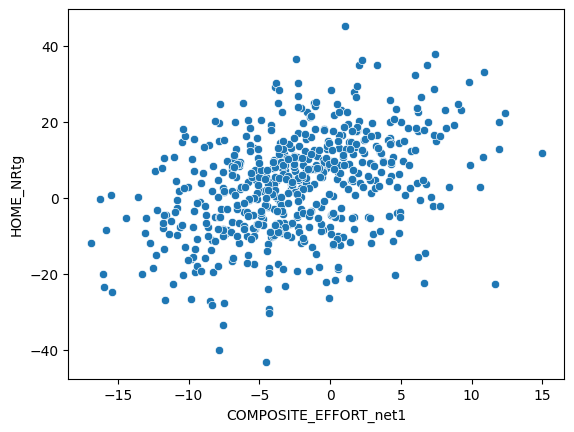

In [41]:
sns.scatterplot(x='COMPOSITE_EFFORT_net1',y='HOME_NRtg',data=df_trans)

In [43]:
display(df_trans[['COMPOSITE_EFFORT_net1','HOME_NRtg']].corr(method='pearson'))
display(df_trans[['COMPOSITE_EFFORT_net1','HOME_NRtg']].corr(method='spearman'))
display(df_trans[['COMPOSITE_EFFORT_net1','HOME_NRtg']].corr(method='kendall'))

,COMPOSITE_EFFORT_net1,HOME_NRtg
COMPOSITE_EFFORT_net1,1.00000,0.40274
HOME_NRtg,0.40274,1.00000


,COMPOSITE_EFFORT_net1,HOME_NRtg
COMPOSITE_EFFORT_net1,1.000000,0.405605
HOME_NRtg,0.405605,1.000000


,COMPOSITE_EFFORT_net1,HOME_NRtg
COMPOSITE_EFFORT_net1,1.000000,0.281333
HOME_NRtg,0.281333,1.000000
